In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("data/lungCancer_train.csv",header=None)
data2 = pd.read_csv("data/lungCancer_test.csv", header=None)
data = data1.append(data2)
data_length = data.shape[1]
data_length

12534

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.DataFrame(data.values,columns=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,atribut12533
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [5]:
data = data.rename(columns={'atribut12533': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [6]:
data['status'].value_counts()

ADCA            150
Mesothelioma     31
Name: status, dtype: int64

In [7]:
data.loc[data['status'] == 'ADCA', ['status']] = 0
data.loc[data['status'] == 'Mesothelioma', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,1
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,1
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,1
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,1
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,1


In [8]:
data = data.apply(pd.to_numeric)

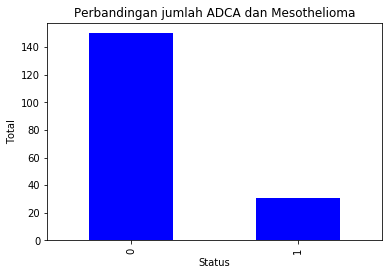

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah ADCA dan Mesothelioma")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,244.207735,46.787293,7.650276,-116.309392,21.091160,712.283425,31.027624,561.190055,1078.552486,882.119337,...,16.253039,48.505525,5.486740,136.919890,24.379558,59.979006,20.958011,44.710497,-38.600552,0.171271
std,93.719648,25.269030,27.072546,101.908620,25.519259,610.137460,95.584894,245.788947,1927.681693,344.191295,...,15.666115,33.061493,15.926834,54.241004,39.411149,42.838666,49.979540,37.167975,109.955702,0.377790
min,-11.000000,-17.800000,-69.500000,-291.100000,-121.200000,-14.400000,-84.300000,28.300000,126.900000,193.500000,...,-42.300000,-99.300000,-40.900000,-209.100000,-76.600000,-6.300000,-63.900000,-208.100000,-444.900000,0.000000
25%,190.000000,32.200000,-8.700000,-176.800000,5.500000,286.000000,-1.200000,399.900000,384.700000,624.900000,...,9.100000,35.200000,-3.200000,102.500000,1.900000,28.400000,6.600000,28.300000,-98.100000,0.000000
50%,243.200000,44.800000,5.600000,-132.700000,21.300000,538.100000,20.400000,514.000000,788.600000,815.100000,...,15.200000,52.600000,5.300000,140.500000,16.900000,49.100000,14.800000,46.100000,-61.600000,0.000000
75%,295.100000,56.400000,17.800000,-80.600000,37.300000,947.600000,40.300000,693.200000,1020.400000,1106.500000,...,22.200000,66.400000,15.100000,167.500000,37.100000,85.300000,23.500000,63.900000,3.200000,0.000000
max,549.000000,178.700000,185.100000,361.200000,76.300000,4882.000000,1004.600000,1493.500000,21804.400000,2017.800000,...,121.400000,193.700000,48.800000,283.200000,205.800000,250.000000,597.500000,143.100000,421.500000,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

In [35]:
lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
coeff = pd.DataFrame({
    "coef" : lasso.coef_!=0
})
coeff_terpilih = np.sum(lasso.coef_!=0)
coeff_terpilih

20

In [37]:
fitur = coeff[coeff["coef"]==True].index.tolist()

In [38]:
X_trainLasso = X_train[["atribut"+str(i) for i in fitur]]
X_trainLasso.head()

,atribut1610,atribut2330,atribut2548,atribut3201,atribut3333,atribut3360,atribut4335,atribut5355,atribut5853,atribut7045,atribut7764,atribut7794,atribut8171,atribut8392,atribut8857,atribut9228,atribut9823,atribut11469,atribut11840,atribut11900
0,0.317563,0.057678,0.064973,0.437457,0.261573,0.278373,0.123226,0.176711,0.031862,0.443093,0.132166,0.000000,0.081046,0.000000,0.118170,0.284087,0.178726,0.109397,0.056322,0.842844
1,0.693246,0.055438,0.595081,1.000000,0.981933,0.787580,0.250577,0.380973,0.106638,0.002612,0.983621,0.190248,0.552953,0.482668,0.338416,0.101698,0.066727,0.620557,0.873276,0.320720
2,0.012200,0.244208,0.026819,0.245105,0.080032,0.195681,0.037078,0.174128,0.303314,0.932575,0.010629,0.195656,0.134215,0.102961,0.342228,0.065886,0.128651,0.071921,0.113810,0.601566
3,0.474710,0.806382,0.396519,0.467519,0.579597,0.325243,0.452608,0.318554,0.450703,0.001336,0.601411,0.654353,0.605259,0.796602,0.989835,0.419502,0.000000,0.351061,0.609397,0.194792
4,0.184784,0.148827,0.060318,0.203294,0.134668,0.131403,0.074802,0.109987,0.035933,0.064554,0.046001,0.144685,0.402788,0.258609,0.161796,0.069917,0.137430,0.163681,0.030277,0.967653


In [39]:
X_testLasso = X_test[["atribut"+str(i) for i in fitur]]
X_testLasso.head()

,atribut1610,atribut2330,atribut2548,atribut3201,atribut3333,atribut3360,atribut4335,atribut5355,atribut5853,atribut7045,atribut7764,atribut7794,atribut8171,atribut8392,atribut8857,atribut9228,atribut9823,atribut11469,atribut11840,atribut11900
0,0.127795,0.207893,0.073677,0.174960,0.094689,0.074489,0.009457,0.133663,0.175573,0.589139,0.020387,0.193693,0.191551,0.477617,0.062262,0.072940,0.468939,0.109948,0.075655,0.411759
1,0.036051,0.058953,0.034106,0.193043,0.149470,0.201707,0.074995,0.217822,0.102842,0.394850,0.036940,0.148436,0.156057,0.095156,0.196527,0.150298,0.435281,0.078258,0.131101,0.392127
2,0.744021,0.634624,0.364943,0.173462,0.689087,0.129729,0.917209,0.614938,0.321153,-0.002114,0.112128,0.536811,0.632418,1.187672,0.397713,0.275405,0.156956,0.278314,0.142117,0.255213
3,0.012653,0.055587,0.042911,0.401520,0.118923,0.099096,0.035330,0.198881,0.157557,0.369507,0.034588,0.114140,0.366863,0.230716,0.385853,0.073870,0.591725,0.174153,0.130517,0.419896
4,0.200770,0.042781,0.042101,0.202373,0.171093,0.141279,0.031816,0.188765,0.056171,0.356775,0.083203,0.119301,0.186808,0.110308,0.094875,0.025657,0.608023,0.055663,0.077625,0.380124


In [40]:
model_rfg = RandomForestClassifier()

In [41]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [42]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_trainLasso, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   60.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [43]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}

1.000 (+/-0.000) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.993 (+/-0.020) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.993 (+/-0.020) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.986 (+/-0.039) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
1.000 (+/-0.000) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.993 (+/-0.020) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
1.000 (+/-0.000) for {'n_estimators': 400, 'min_samples_split': 2, '

In [44]:
random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'bootstrap': True}

In [45]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [2],
               'bootstrap': [True]
                     }

In [46]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_trainLasso, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.9s finished


Best Params :  {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

1.000 (+/-0.000) for {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.993 (+/-0.020) for {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 400}
1.000 (+/-0.000) for {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 600}
0.993 (+/-0.020) for {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 800}
1.000 (+/-0.000) for {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


In [47]:
classifier = grid_search.best_estimator_

In [48]:
classifier.fit(X_trainLasso, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
prediksi = classifier.predict(X_testLasso)
prediksi

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [50]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
164,0,0
101,0,0
45,1,1
28,0,0
150,0,0
10,1,1
0,1,1
3,1,1
64,0,0
135,0,0


In [51]:
accuracy_score(y_test,prediksi)

1.0

In [52]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         7

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



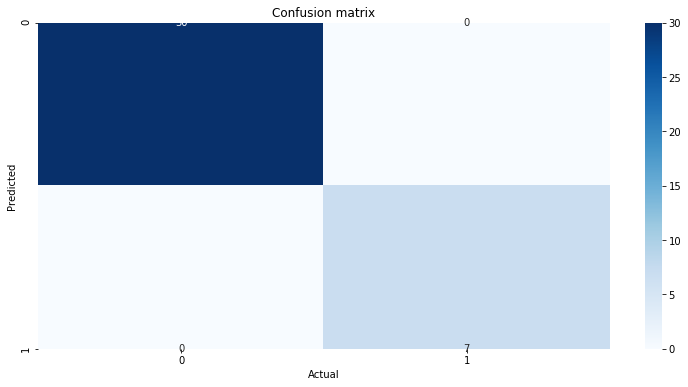

In [53]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [54]:
confusion_matrix(y_test,prediksi)

array([[30,  0],
       [ 0,  7]], dtype=int64)